# San Diego Crime Analysis 
### by: Tanya Dilan

In [161]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import folium
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [6]:
#load data directly from url
SD_data = pd.read_csv("https://seshat.datasd.org/police_nibrs/pd_nibrs_datasd.csv",engine='python')
pd.DataFrame(SD_data)
SD_data.head(20)
SD_data.columns


Index(['objectid', 'nibrs_uniq', 'case_number', 'occured_on', 'approved_on',
       'day_of_week', 'month', 'year', 'code_section', 'group_type',
       'ibr_category', 'crime_against', 'ibr_offense',
       'ibr_offense_description', 'pd_offense_category', 'violent_crime',
       'property_crime', 'beat', 'neighborhood', 'service_area',
       'division_number', 'division', 'block_addr', 'city', 'state', 'zip',
       'query_run_date', 'geocode_status', 'geocode_score', 'latitude',
       'longitude'],
      dtype='object')

In [8]:
#info on the dataframe
SD_data.info(verbose=True, show_counts=True)

#drop irrelevant columns 
df = SD_data.drop(['geocode_status','geocode_score','group_type','beat','query_run_date','service_area','division_number','nibrs_uniq','case_number'], axis = 1)
df.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389076 entries, 0 to 389075
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   objectid                 389076 non-null  int64  
 1   nibrs_uniq               389076 non-null  object 
 2   case_number              389076 non-null  object 
 3   occured_on               389076 non-null  object 
 4   approved_on              389070 non-null  object 
 5   day_of_week              389076 non-null  int64  
 6   month                    389076 non-null  int64  
 7   year                     389076 non-null  int64  
 8   code_section             389070 non-null  object 
 9   group_type               389076 non-null  object 
 10  ibr_category             389076 non-null  object 
 11  crime_against            309473 non-null  object 
 12  ibr_offense              389076 non-null  object 
 13  ibr_offense_description  389076 non-null  object 
 14  pd_o

,objectid,occured_on,approved_on,day_of_week,month,year,code_section,ibr_category,crime_against,ibr_offense,...,violent_crime,property_crime,neighborhood,division,block_addr,city,state,zip,latitude,longitude
0,1,2021-07-11 20:45:00,2021-07-11 23:13:45,1,7,2021,148 (A)(1) PC OBSTRUCT/RESIST PEACE OFCR/EMER ...,"GROUP ""B"" OFFENSES",NaN,90Z,...,0,0,Stockton,Central,100 31st ST,SAN DIEGO,CA,92102.0,32.706474,-117.127455
1,2,2022-02-11 22:00:00,2022-02-14 20:38:50,6,2,2022,459 PC BURGLARY (VEHICLE) (F) ||,LARCENY/THEFT OFFENSES,PR,23F,...,0,1,Mira Mesa,Northeastern,10000 MAYA LINDA ROAD,SAN DIEGO,CA,92126.0,32.901073,-117.120120
2,3,2021-05-02 06:00:00,2021-05-06 19:12:50,1,5,2021,273.5 (A) PC SPOUSAL/COHABITANT ABUSE WITH MIN...,ASSAULT OFFENSES,PE,13B,...,0,0,Midway District,Western,3800 Greenwood ST,SAN DIEGO,CA,92110.0,32.754899,-117.206022
3,4,2022-09-21 12:46:21,2022-11-03 14:32:03,4,9,2022,273 A (A) PC WILLFUL CRUELTY TO CHILD: WITH IN...,ASSAULT OFFENSES,PE,13A,...,1,0,Unknown,Unknown,NaN,Mecca,CA,92254.0,NaN,NaN
4,5,2021-01-09 11:23:00,2021-01-09 22:09:28,7,1,2021,10851 (A) VC OTHER AGENCY VEHICLE THEFT/RECOVE...,STOLEN PROPERTY OFFENSES,PR,280,...,0,0,Egger Highlands,Southern,1100 Walnut AVE,CHULA VISTA,CA,91911.0,32.605965,-117.088752
5,6,2023-03-04 01:04:00,2023-03-06 14:57:10,7,3,2023,10851 (A) VC TAKE VEHICLE W/O OWNER'S CONSENT/...,MOTOR VEHICLE THEFT,PR,240,...,0,0,Rolando,Mid-City,4500 Mataro DR,SAN DIEGO,CA,92115.0,32.759579,-117.055797
6,7,2020-02-04 11:00:00,2020-02-05 14:23:11,3,2,2020,BW-F ZZ FELONY BENCH WARRANT (OUR AGENCY) ||,"GROUP ""B"" OFFENSES",NaN,90Z,...,0,0,El Cerrito,Mid-City,5600 University AVE,SAN DIEGO,CA,92105.0,32.747827,-117.075640
7,8,2022-09-13 01:27:00,2022-09-28 14:58:33,3,9,2022,211 PC ROBBERY (F) ||,ROBBERY,PR,120,...,1,0,Ocean Beach,Western,Santa Monica AVE & sunset Cliffs BLVD,SAN DIEGO,CA,92107.0,32.745571,-117.246865
8,9,2021-04-12 18:19:00,2021-04-14 07:04:40,2,4,2021,11550 (A) HS USE/UNDER INFL OF CONTROLLED SUBS...,DRUG/NARCOTIC OFFENSES,SO,35A,...,0,0,Kearney Mesa,Eastern,7800 Clairemont Mesa BLVD,SAN DIEGO,CA,92111.0,32.832790,-117.153204
9,10,2022-11-19 12:30:27,2022-12-01 12:17:28,7,11,2022,242 PC SIMPLE BATTERY (M) ||,ASSAULT OFFENSES,PE,13B,...,0,0,East Village,Central,1500 Commercial ST,SAN DIEGO,CA,92113.0,32.705280,-117.150274


In [10]:
#grab unique entries for types or crime
types_of_crime = df['neighborhood'].unique().tolist()
print(types_of_crime)

['Stockton', 'Mira Mesa', 'Midway District', 'Unknown', 'Egger Highlands', 'Rolando', 'El Cerrito', 'Ocean Beach', 'Kearney Mesa', 'East Village', 'Cortez', 'Mission Beach', 'Gaslamp', 'Colina Del Sol', 'South Park', 'San Ysidro', 'Talmadge', 'College West', 'Normal Heights', 'Del Mar Heights', 'Teralta East', 'La Jolla', 'Little Italy', 'Corridor', 'Ocean Crest', 'Skyline', 'Sorrento Valley', 'Bay Park', 'Azalea/Hollywood Park', 'Pacific Beach', 'North Clairemont', 'Birdland', 'North Park', 'Hillcrest', 'North City', 'La Playa', 'Carmel Mountain', 'University City', 'Clairemont Mesa East', 'Barrio Logan', 'Linda Vista', 'Mission Valley East', 'Horton Plaza', 'Marina', 'Ridgeview/Webster', 'Scripps Ranch', 'Serra Mesa', 'Paradise Hills', 'Otay Mesa', 'Mountain View', 'Core-Columbia', 'Lincoln Park', 'Oak Park', 'Carmel Valley', 'Park West', 'Harborview', 'Clairemont Mesa West', 'Otay Mesa West', 'Castle', 'Rancho Bernardo', 'Teralta West', 'Cherokee Point', 'Rancho Penasquitos', 'Grant

In [12]:
#drop na values

df.dropna(subset=['latitude', 'longitude'], inplace=True)
df.head(20)

,objectid,occured_on,approved_on,day_of_week,month,year,code_section,ibr_category,crime_against,ibr_offense,...,violent_crime,property_crime,neighborhood,division,block_addr,city,state,zip,latitude,longitude
0,1,2021-07-11 20:45:00,2021-07-11 23:13:45,1,7,2021,148 (A)(1) PC OBSTRUCT/RESIST PEACE OFCR/EMER ...,"GROUP ""B"" OFFENSES",NaN,90Z,...,0,0,Stockton,Central,100 31st ST,SAN DIEGO,CA,92102.0,32.706474,-117.127455
1,2,2022-02-11 22:00:00,2022-02-14 20:38:50,6,2,2022,459 PC BURGLARY (VEHICLE) (F) ||,LARCENY/THEFT OFFENSES,PR,23F,...,0,1,Mira Mesa,Northeastern,10000 MAYA LINDA ROAD,SAN DIEGO,CA,92126.0,32.901073,-117.120120
2,3,2021-05-02 06:00:00,2021-05-06 19:12:50,1,5,2021,273.5 (A) PC SPOUSAL/COHABITANT ABUSE WITH MIN...,ASSAULT OFFENSES,PE,13B,...,0,0,Midway District,Western,3800 Greenwood ST,SAN DIEGO,CA,92110.0,32.754899,-117.206022
4,5,2021-01-09 11:23:00,2021-01-09 22:09:28,7,1,2021,10851 (A) VC OTHER AGENCY VEHICLE THEFT/RECOVE...,STOLEN PROPERTY OFFENSES,PR,280,...,0,0,Egger Highlands,Southern,1100 Walnut AVE,CHULA VISTA,CA,91911.0,32.605965,-117.088752
5,6,2023-03-04 01:04:00,2023-03-06 14:57:10,7,3,2023,10851 (A) VC TAKE VEHICLE W/O OWNER'S CONSENT/...,MOTOR VEHICLE THEFT,PR,240,...,0,0,Rolando,Mid-City,4500 Mataro DR,SAN DIEGO,CA,92115.0,32.759579,-117.055797
6,7,2020-02-04 11:00:00,2020-02-05 14:23:11,3,2,2020,BW-F ZZ FELONY BENCH WARRANT (OUR AGENCY) ||,"GROUP ""B"" OFFENSES",NaN,90Z,...,0,0,El Cerrito,Mid-City,5600 University AVE,SAN DIEGO,CA,92105.0,32.747827,-117.075640
7,8,2022-09-13 01:27:00,2022-09-28 14:58:33,3,9,2022,211 PC ROBBERY (F) ||,ROBBERY,PR,120,...,1,0,Ocean Beach,Western,Santa Monica AVE & sunset Cliffs BLVD,SAN DIEGO,CA,92107.0,32.745571,-117.246865
8,9,2021-04-12 18:19:00,2021-04-14 07:04:40,2,4,2021,11550 (A) HS USE/UNDER INFL OF CONTROLLED SUBS...,DRUG/NARCOTIC OFFENSES,SO,35A,...,0,0,Kearney Mesa,Eastern,7800 Clairemont Mesa BLVD,SAN DIEGO,CA,92111.0,32.832790,-117.153204
9,10,2022-11-19 12:30:27,2022-12-01 12:17:28,7,11,2022,242 PC SIMPLE BATTERY (M) ||,ASSAULT OFFENSES,PE,13B,...,0,0,East Village,Central,1500 Commercial ST,SAN DIEGO,CA,92113.0,32.705280,-117.150274
10,11,2022-06-29 20:27:00,2022-07-01 07:45:33,4,6,2022,29800 (A)(1) PC FELON/ADDICT/POSSESS/ETC FIREA...,WEAPON LAW VIOLATIONS,SO,520,...,0,0,Unknown,Unknown,8300 Verde Ridge RD,CN,CA,91977.0,32.695627,-117.021630


In [149]:
# Add frequency count of ibr_categories to new dataframe
#when doing groupby().size() pandas reverts df back to object, reset the index and name the new column (

new_df = df.groupby(['occured_on', 'latitude','longitude',
                     'neighborhood','year',
                     'ibr_category','code_section'])['ibr_category'].size().reset_index(name= "frequency_ibr") 
new_df.query('neighborhood != "Unknown"')

,occured_on,latitude,longitude,neighborhood,year,ibr_category,code_section,frequency_ibr
0,2020-01-01 00:00:01,32.768514,-117.068595,College West,2020,FRAUD OFFENSES,530.5 (A) PC GET CREDIT/ETC OTHER'S ID (F) ||,1
1,2020-01-01 00:00:01,32.796628,-117.255438,Pacific Beach,2020,LARCENY/THEFT OFFENSES,488 PC PETTY THEFT(All Other Larceny) (M) ||,1
2,2020-01-01 00:00:01,32.968676,-117.175254,Carmel Valley,2020,FRAUD OFFENSES,530.5 (A) PC GET CREDIT/ETC OTHER'S ID (F) ||,1
3,2020-01-01 00:00:30,32.716822,-117.157366,Core-Columbia,2020,FRAUD OFFENSES,530 PC PERSONATE TO GET MONEY/PROP [OVER $400]...,1
4,2020-01-01 00:01:00,32.562486,-116.988279,Otay Mesa,2020,LARCENY/THEFT OFFENSES,488 PC PETTY THEFT(All Other Larceny) (M) ||,1
...,...,...,...,...,...,...,...,...
367402,2024-09-05 22:35:05,32.709379,-117.160107,Gaslamp,2024,DRUG/NARCOTIC OFFENSES,11550 (A) HS USE/UNDER INFL OF CONTROLLED SUBS...,1
367403,2024-09-05 23:25:00,32.711692,-117.160359,Gaslamp,2024,"GROUP ""B"" OFFENSES",647 (F) PC DISORD CONDUCT:ALC (M) ||,1
367404,2024-09-05 23:44:00,32.769994,-117.206520,Morena,2024,"GROUP ""B"" OFFENSES",23152 (B) VC DUI ALC/0.08 PERCENT (M) || 23152...,1
367405,2024-09-06 00:20:00,32.751256,-117.204747,Midway District,2024,"GROUP ""B"" OFFENSES",OW-F ZZ FELONY OTHER AGENCY'S WARRANT ||,1


In [151]:
#extract date
new_df['occured_on'] = pd.to_datetime(new_df['occured_on'])
new_df['month'] = new_df['occured_on'].dt.month



#filter by neighboorhood

new_df = new_df[(new_df['neighborhood'].isin(['University Heights','North Park']))]
new_df.tail(20)



,occured_on,latitude,longitude,neighborhood,year,ibr_category,code_section,frequency_ibr,month
367071,2024-09-03 10:54:45,32.747471,-117.126164,North Park,2024,DRUG/NARCOTIC OFFENSES,11364(A) HS POSS CONTROLLED SUBS PARAPHERNALIA...,1,9
367072,2024-09-03 10:54:45,32.747471,-117.126164,North Park,2024,DRUG/NARCOTIC OFFENSES,11377 (A) HS POSSESS CONTROLLED SUBSTANCE (M) ||,1,9
367081,2024-09-03 12:00:00,32.752294,-117.146410,University Heights,2024,MOTOR VEHICLE THEFT,10851 (A) VC TAKE VEHICLE W/O OWNER'S CONSENT/...,1,9
367090,2024-09-03 13:50:00,32.752240,-117.140115,University Heights,2024,"GROUP ""B"" OFFENSES",5150 WI MENTAL DISORDER 72 HR OBSERVATION ||,1,9
367103,2024-09-03 16:35:47,32.755363,-117.127634,North Park,2024,"GROUP ""B"" OFFENSES",5150 WI MENTAL DISORDER 72 HR OBSERVATION ||,1,9
367111,2024-09-03 18:00:00,32.748523,-117.126507,North Park,2024,EMBEZZLEMENT,368(D)(2) PC THEFT OF ELDER/DEPENDENT ADULT (E...,1,9
367115,2024-09-03 18:25:00,32.757316,-117.136425,North Park,2024,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,594 (B)(2)(A) PC VANDALISM [$400 OR LESS] (M)...,1,9
367136,2024-09-03 21:00:00,32.759162,-117.143708,University Heights,2024,MOTOR VEHICLE THEFT,10851 (A) VC TAKE VEHICLE W/O OWNER'S CONSENT/...,1,9
367160,2024-09-03 23:50:00,32.750404,-117.128986,North Park,2024,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,594 (B)(1) PC VANDALISM ($400 OR MORE) (F) ||,1,9
367167,2024-09-04 01:10:00,32.759143,-117.148858,University Heights,2024,LARCENY/THEFT OFFENSES,487 (A) PC GRAND THEFT:MONEY/LABOR/PROPERTY (F...,1,9


In [155]:
crime_trends = new_df.groupby(['year','ibr_category','month']).size().reset_index(name='case_count')
crime_trends.tail(20)

,year,ibr_category,month,case_count
728,2024,"SEX OFFENSES, FORCIBLE",2,4
729,2024,"SEX OFFENSES, FORCIBLE",3,1
730,2024,"SEX OFFENSES, FORCIBLE",4,1
731,2024,"SEX OFFENSES, FORCIBLE",5,1
732,2024,"SEX OFFENSES, FORCIBLE",8,2
733,2024,STOLEN PROPERTY OFFENSES,1,1
734,2024,STOLEN PROPERTY OFFENSES,3,2
735,2024,STOLEN PROPERTY OFFENSES,4,1
736,2024,STOLEN PROPERTY OFFENSES,5,3
737,2024,STOLEN PROPERTY OFFENSES,6,2


In [119]:
# new_df = new_df[(new_df['year'] == 2023)  & (new_df['neighborhood'].isin(['University Heights','North Park']))]
# new_df.head(20)

,latitude,longitude,neighborhood,year,ibr_category,code_section,frequency_ibr
4893,32.554360,-116.934030,North Park,2023,MOTOR VEHICLE THEFT,10851 (A) VC TAKE VEHICLE W/O OWNER'S CONSENT/...,1
23124,32.679068,-117.064762,North Park,2023,MOTOR VEHICLE THEFT,10851 (A) VC TAKE VEHICLE W/O OWNER'S CONSENT/...,1
34786,32.699098,-117.127318,North Park,2023,MOTOR VEHICLE THEFT,10851 (A) VC TAKE VEHICLE W/O OWNER'S CONSENT/...,1
93041,32.722864,-117.118340,North Park,2023,ASSAULT OFFENSES,273.5 (A) PC SPOUSAL/COHABITANT ABUSE WITH SER...,1
93042,32.722864,-117.118340,North Park,2023,ASSAULT OFFENSES,368 (B)(1) PC CAUSE HARM/DEATH OF ELDER /DEPEN...,1
93043,32.722864,-117.118340,North Park,2023,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,594 (B)(2)(A) PC VANDALISM [$400 OR LESS] (M)...,1
93970,32.723273,-117.119855,North Park,2023,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,10852 VC TAMPER WITH VEH ||,1
95003,32.724257,-117.120487,North Park,2023,ASSAULT OFFENSES,273.5 (A) PC SPOUSAL/COHABITANT ABUSE WITH MIN...,1
95004,32.724257,-117.120487,North Park,2023,KIDNAPING/ABDUCTION,236 PC FALSE IMPRISONMENT (M) ||,1
96406,32.725480,-117.118363,North Park,2023,ASSAULT OFFENSES,273 A (B) PC WILLFUL CRUELTY TO CHILD NO GBI ...,1


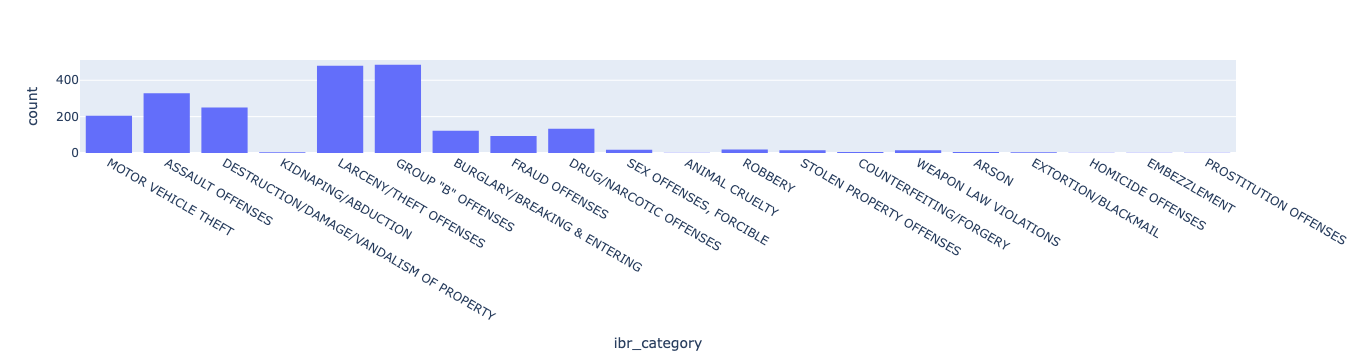

In [129]:
#look at the number of cases in north park in 2023 for the ibr_category

fig = px.histogram(new_df, x="ibr_category")
fig.show()

In [121]:
coordinates = [32.7157, -117.1611] # San Diego, California's latitude and longitude
map = folium.Map(location=coordinates, tiles="cartodb positron")
map

In [123]:
# Add all the individual earthquakes to the map
def get_radius(freq):
    if freq < 5:
        return .5
    elif freq < 15:
        return 1
    elif freq < 50:
          return 2

for idx, row in new_df.iterrows():
    color = '#0a9396' if row['frequency_ibr'] < 4 else '#ee9b00' if row['frequency_ibr'] < 6 else '#ae2012'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=get_radius(row['frequency_ibr']),
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.5,
        weight=1
    ).add_to(map)

In [125]:
map